学习使用R语言处理异方差情形。

In [1]:
library(haven)
library(tidyverse)
nerlove <- read_dta("stata_data/nerlove.dta")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the ]8;;http://conflicted.r-lib.org/conflicted package]8;; to force all conflicts to become errors


In [2]:
nerlove

# A tibble: 145 × 10
       tc     q    pl    pf    pk    lntc   lnq  lnpf  lnpk  lnpl
    <dbl> <dbl> <dbl> <dbl> <dbl>   <dbl> <dbl> <dbl> <dbl> <dbl>
 1 0.0820     2  2.10  17.9   183 -2.50   0.693  2.88  5.21 0.742
 2 0.661      3  2.10  35.1   174 -0.414  1.10   3.56  5.16 0.742
 3 0.990      4  2.10  35.1   171 -0.0101 1.39   3.56  5.14 0.742
 4 0.315      4  1.80  32.2   166 -1.16   1.39   3.47  5.11 0.588
 5 0.197      5  2.10  28.6   233 -1.62   1.61   3.35  5.45 0.742
 6 0.0980     9  2.10  28.6   195 -2.32   2.20   3.35  5.27 0.742
 7 0.949     11  2     35.5   206 -0.0523 2.40   3.57  5.33 0.693
 8 0.675     13  2.10  35.1   150 -0.393  2.56   3.56  5.01 0.742
 9 0.525     13  2.20  29.1   155 -0.644  2.56   3.37  5.04 0.788
10 0.501     22  1.70  15     188 -0.691  3.09   2.71  5.24 0.531
# ℹ 135 more rows
# ℹ Use `print(n = ...)` to see more rows

# 画残差图

In [3]:
fit <- lm(lntc ~ lnq + lnpf + lnpk + lnpl, data = nerlove)

In [4]:
summary(fit)


Call:
lm(formula = lntc ~ lnq + lnpf + lnpk + lnpl, data = nerlove)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.97203 -0.23377 -0.01091  0.16185  1.80985 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.56651    1.77938  -2.004    0.047 *  
lnq          0.72091    0.01743  41.352  < 2e-16 ***
lnpf         0.42581    0.10032   4.244 3.97e-05 ***
lnpk        -0.21515    0.33983  -0.633    0.528    
lnpl         0.45596    0.29980   1.521    0.131    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3923 on 140 degrees of freedom
Multiple R-squared:  0.926,	Adjusted R-squared:  0.9239 
F-statistic: 437.9 on 4 and 140 DF,  p-value: < 2.2e-16


载入需要的程序包：carData

载入程序包：‘car’

The following object is masked from ‘package:dplyr’:

    recode

The following object is masked from ‘package:purrr’:

    some



警告信息:
In spreadLevelPlot.lm(fit) : 
16 negative fitted values removed


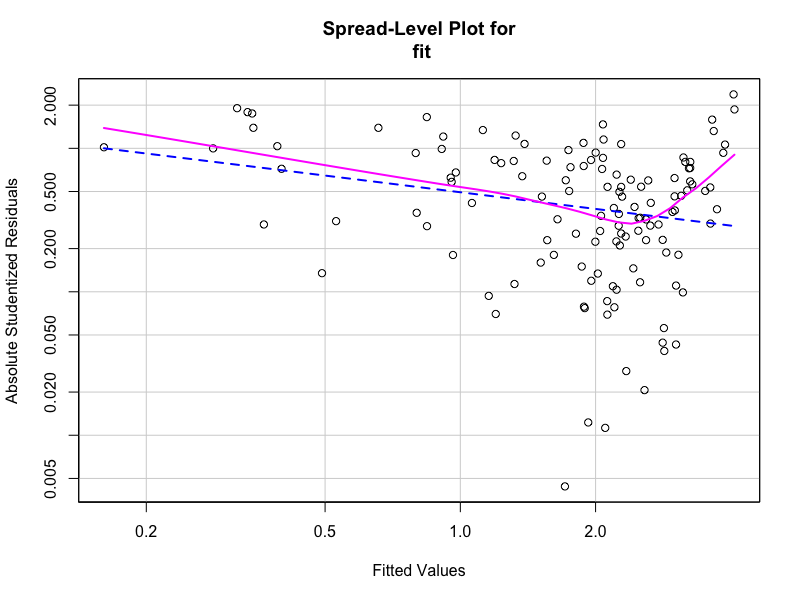


Suggested power transformation:  1.38625 

In [5]:
library(car)
spreadLevelPlot(fit)

# White检验

先自己构建一个White检验试试看。

In [6]:
# 回归获得残差
fit <- lm(lntc ~ lnq + lnpf + lnpk + lnpl, data = nerlove)

In [7]:
# 在data frame中加入残差的平方项
nerlove_white <- nerlove |> 
  mutate(res_square = fit$residuals^2)

nerlove_white

# A tibble: 145 × 11
       tc     q    pl    pf    pk    lntc   lnq  lnpf  lnpk  lnpl res_square
    <dbl> <dbl> <dbl> <dbl> <dbl>   <dbl> <dbl> <dbl> <dbl> <dbl>      <dbl>
 1 0.0820     2  2.10  17.9   183 -2.50   0.693  2.88  5.21 0.742     0.0144
 2 0.661      3  2.10  35.1   174 -0.414  1.10   3.56  5.16 0.742     2.61  
 3 0.990      4  2.10  35.1   171 -0.0101 1.39   3.56  5.14 0.742     3.28  
 4 0.315      4  1.80  32.2   166 -1.16   1.39   3.47  5.11 0.588     0.586 
 5 0.197      5  2.10  28.6   233 -1.62   1.61   3.35  5.45 0.742     0.0354
 6 0.0980     9  2.10  28.6   195 -2.32   2.20   3.35  5.27 0.742     0.945 
 7 0.949     11  2     35.5   206 -0.0523 2.40   3.57  5.33 0.693     1.20  
 8 0.675     13  2.10  35.1   150 -0.393  2.56   3.56  5.01 0.742     0.301 
 9 0.525     13  2.20  29.1   155 -0.644  2.56   3.37  5.04 0.788     0.132 
10 0.501     22  1.70  15     188 -0.691  3.09   2.71  5.24 0.531     0.143 
# ℹ 135 more rows
# ℹ Use `print(n = ...)` to see more 

In [8]:
# 对残差进行辅助回归
fit_white <- lm(
  res_square ~ (lnq + lnpf + lnpk + lnpl)^2 + I(lnq^2) + I(lnpf^2) + I(lnpk^2) + I(lnpl^2), 
  data = nerlove_white
)

# 结果备用，用于提取R 方等参数
result <- summary(fit_white)

In [9]:
result


Call:
lm(formula = res_square ~ (lnq + lnpf + lnpk + lnpl)^2 + I(lnq^2) + 
    I(lnpf^2) + I(lnpk^2) + I(lnpl^2), data = nerlove_white)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.91987 -0.08957 -0.00977  0.07473  1.84624 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -53.318102  55.141525  -0.967  0.33537    
lnq          -1.071331   0.658943  -1.626  0.10641    
lnpf         -6.380559   5.340893  -1.195  0.23439    
lnpk         24.839471  20.394046   1.218  0.22544    
lnpl          8.292634  11.255177   0.737  0.46258    
I(lnq^2)      0.032475   0.005213   6.230    6e-09 ***
I(lnpf^2)    -0.217969   0.185446  -1.175  0.24199    
I(lnpk^2)    -2.892890   1.927121  -1.501  0.13574    
I(lnpl^2)    -0.357913   1.838471  -0.195  0.84595    
lnq:lnpf     -0.150873   0.046131  -3.271  0.00137 ** 
lnq:lnpk      0.213300   0.122527   1.741  0.08408 .  
lnq:lnpl     -0.007766   0.137959  -0.056  0.95519    
lnpf:lnpk     1.579697   1.06

In [10]:
nrow(nerlove_white)

[1] 145

In [11]:
nrow(result$coefficients)

[1] 15

In [12]:
# 设置小数位数
options(digits = 10)

# 构造统计量n*R^2
n_R_square <- nrow(nerlove_white)*result$r.squared
print(paste("Chi^2 统计量为：", n_R_square), digits = 3)

# 计算自由度
df <- nrow(result$coefficients) - 1 # 一次项+二次项+交互项，-1 是去掉了常数项
print(paste("自由度为：", df))

# 假设检验
p_value <- 1 - pchisq(n_R_square, df = df)
print(paste("p值为：", p_value))

[1] "Chi^2 统计量为： 73.8770971533059"
[1] "自由度为： 14"
[1] "p值为： 3.80006248690279e-10"


下面是用{lmtest}包进行white检验：

In [13]:
library(lmtest)
bptest(
  fit,
  ~ (lnq+lnpf+lnpk+lnpl)^2 + I(lnq^2) + I(lnpf^2) + I(lnpk^2) + I(lnpl^2),
  data = nerlove
)

载入需要的程序包：zoo

载入程序包：‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




	studentized Breusch-Pagan test

data:  fit
BP = 73.877097, df = 14, p-value = 3.800062e-10


# BP检验

In [14]:
# 直接使用bptest()即可
bptest(fit)


	studentized Breusch-Pagan test

data:  fit
BP = 36.16346, df = 4, p-value = 2.678071e-07


In [15]:
bptest(fit, ~lnq, data = nerlove)


	studentized Breusch-Pagan test

data:  fit
BP = 32.095152, df = 1, p-value = 1.468032e-08


# 稳健标准误+OLS

In [16]:
library(sandwich)
robust_se <- vcovHC(fit, type = "HC0")

library(lmtest)
coeftest(fit, robust_se)


t test of coefficients:

                Estimate   Std. Error  t value   Pr(>|t|)    
(Intercept) -3.566512824  1.688418373 -2.11234   0.036433 *  
lnq          0.720913488  0.031971641 22.54853 < 2.22e-16 ***
lnpf         0.425813749  0.072785732  5.85024 3.3185e-08 ***
lnpk        -0.215147640  0.317746872 -0.67710   0.499457    
lnpl         0.455964500  0.255798216  1.78252   0.076832 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# WLS

In [17]:
# 先进行普通回归获得残差
fit <- lm(lntc ~ lnq + lnpf + lnpk + lnpl, data = nerlove)

In [18]:
# 先计算残差平方
nerlove_wls <- nerlove |> 
  mutate(res_square = fit$residuals^2)

In [19]:
# 残差平方和对数化，避免出现负的方差
nerlove_wls <- nerlove_wls |> 
  mutate(ln_res_square = log(res_square))

In [20]:
nerlove_wls

# A tibble: 145 × 12
       tc     q    pl    pf    pk    lntc   lnq  lnpf  lnpk  lnpl res_square
    <dbl> <dbl> <dbl> <dbl> <dbl>   <dbl> <dbl> <dbl> <dbl> <dbl>      <dbl>
 1 0.0820     2  2.10  17.9   183 -2.50   0.693  2.88  5.21 0.742     0.0144
 2 0.661      3  2.10  35.1   174 -0.414  1.10   3.56  5.16 0.742     2.61  
 3 0.990      4  2.10  35.1   171 -0.0101 1.39   3.56  5.14 0.742     3.28  
 4 0.315      4  1.80  32.2   166 -1.16   1.39   3.47  5.11 0.588     0.586 
 5 0.197      5  2.10  28.6   233 -1.62   1.61   3.35  5.45 0.742     0.0354
 6 0.0980     9  2.10  28.6   195 -2.32   2.20   3.35  5.27 0.742     0.945 
 7 0.949     11  2     35.5   206 -0.0523 2.40   3.57  5.33 0.693     1.20  
 8 0.675     13  2.10  35.1   150 -0.393  2.56   3.56  5.01 0.742     0.301 
 9 0.525     13  2.20  29.1   155 -0.644  2.56   3.37  5.04 0.788     0.132 
10 0.501     22  1.70  15     188 -0.691  3.09   2.71  5.24 0.531     0.143 
# ℹ 135 more rows
# ℹ 1 more variable: ln_res_square <d

In [21]:
glimpse(nerlove_wls)

Rows: 145
Columns: 12
$ tc            <dbl> 0.08200000226, 0.66100001335, 0.99000000954, 0.314999997…
$ q             <dbl> 2, 3, 4, 4, 5, 9, 11, 13, 13, 22, 25, 25, 35, 39, 43, 63…
$ pl            <dbl> 2.099999905, 2.099999905, 2.099999905, 1.799999952, 2.09…
$ pf            <dbl> 17.89999962, 35.09999847, 35.09999847, 32.20000076, 28.6…
$ pk            <dbl> 183, 174, 171, 166, 233, 195, 206, 150, 155, 188, 170, 1…
$ lntc          <dbl> -2.50103592873, -0.41400140524, -0.01005032659, -1.15518…
$ lnq           <dbl> 0.6931471825, 1.0986123085, 1.3862943649, 1.3862943649, …
$ lnpf          <dbl> 2.884800673, 3.558201075, 3.558201075, 3.471966505, 3.35…
$ lnpk          <dbl> 5.209486008, 5.159055233, 5.141663551, 5.111987591, 5.45…
$ lnpl          <dbl> 0.7419372797, 0.7419372797, 0.7419372797, 0.5877866149, …
$ res_square    <dbl> 0.01437637211, 2.61481041605, 3.27556776467, 0.585750026…
$ ln_res_square <dbl> -4.24216924597, 0.96119159625, 1.18649121732, -0.5348621…


In [22]:
# 对残差平方的对数值进行回归
# 回归的形式自己确定，怎么合适怎么来
fit_res <- lm(ln_res_square ~ lnq -1, data = nerlove_wls)

In [23]:
summary(fit_res)


Call:
lm(formula = ln_res_square ~ lnq - 1, data = nerlove_wls)

Residuals:
       Min         1Q     Median         3Q        Max 
-9.1022504 -1.3827294  0.4030561  1.4309146  5.0370746 

Coefficients:
       Estimate  Std. Error   t value   Pr(>|t|)    
lnq -0.55275326  0.02697334 -20.49258 < 2.22e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.217787 on 144 degrees of freedom
Multiple R-squared:  0.7446563,	Adjusted R-squared:  0.7428831 
F-statistic: 419.9458 on 1 and 144 DF,  p-value: < 2.2204e-16


In [24]:
# 获取预测结果
predict_ln_res_square <- predict(fit_res)

# 对数复原
predict_res_square <- exp(predict_ln_res_square)

nerlove_wls <- nerlove_white |> 
  mutate(predict_res_square = predict_res_square)

In [25]:
# 进行WLS
fit_wls <- lm(
  lntc ~ lnq + lnpf + lnpk + lnpl,
  data = nerlove_wls,
  weights = 1 / predict_res_square
)

# 汇报结果
summary(fit_wls)


Call:
lm(formula = lntc ~ lnq + lnpf + lnpk + lnpl, data = nerlove_wls, 
    weights = 1/predict_res_square)

Weighted Residuals:
       Min         1Q     Median         3Q        Max 
-3.7129063 -1.0030236 -0.0107430  0.9453403  6.5646847 

Coefficients:
               Estimate  Std. Error  t value   Pr(>|t|)    
(Intercept) -5.52208801  0.99284719 -5.56187 1.3101e-07 ***
lnq          0.87590349  0.01538409 56.93569 < 2.22e-16 ***
lnpf         0.46724376  0.06164755  7.57928 4.3321e-12 ***
lnpk        -0.09298066  0.19604021 -0.47429  0.6360293    
lnpl         0.56038789  0.17341410  3.23150  0.0015353 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.651523 on 140 degrees of freedom
Multiple R-squared:  0.9623666,	Adjusted R-squared:  0.9612914 
F-statistic: 895.0253 on 4 and 140 DF,  p-value: < 2.2204e-16


# 房价案例

先导入数据集：

In [26]:
library(haven)
hprice2a <- read_dta("stata_data/hprice2a.dta")
hprice2a

# A tibble: 506 × 13
   price   crime   nox rooms  dist radial proptax stratio lowstat lprice  lnox
   <dbl>   <dbl> <dbl> <dbl> <dbl>  <dbl>   <dbl>   <dbl>   <dbl>  <dbl> <dbl>
 1 24000 0.00600  5.38  6.57  4.09      1    29.6    15.3    4.98  10.1   1.68
 2 21599 0.0270   4.69  6.42  4.97      2    24.2    17.8    9.14   9.98  1.55
 3 34700 0.0270   4.69  7.18  4.97      2    24.2    17.8    4.03  10.5   1.55
 4 33400 0.0320   4.58  7     6.06      3    22.2    18.7    2.94  10.4   1.52
 5 36199 0.0690   4.58  7.15  6.06      3    22.2    18.7    5.33  10.5   1.52
 6 28701 0.0300   4.58  6.43  6.06      3    22.2    18.7    5.21  10.3   1.52
 7 22900 0.0880   5.24  6.01  5.56      5    31.1    15.2   12.4   10.0   1.66
 8 27100 0.145    5.24  6.17  5.95      5    31.1    15.2   19.1   10.2   1.66
 9 16500 0.211    5.24  5.63  6.08      5    31.1    15.2   29.9    9.71  1.66
10 18900 0.170    5.24  6     6.59      5    31.1    15.2   17.1    9.85  1.66
# ℹ 496 more rows
# ℹ 2 more va

In [27]:
glimpse(hprice2a)

Rows: 506
Columns: 13
$ price    <dbl> 24000, 21599, 34700, 33400, 36199, 28701, 22900, 27100, 16500…
$ crime    <dbl> 0.006000000052, 0.027000000700, 0.027000000700, 0.03200000152…
$ nox      <dbl> 5.380000114, 4.690000057, 4.690000057, 4.579999924, 4.5799999…
$ rooms    <dbl> 6.570000172, 6.420000076, 7.179999828, 7.000000000, 7.1500000…
$ dist     <dbl> 4.090000153, 4.969999790, 4.969999790, 6.059999943, 6.0599999…
$ radial   <dbl> 1, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4…
$ proptax  <dbl> 29.60000038, 24.20000076, 24.20000076, 22.20000076, 22.200000…
$ stratio  <dbl> 15.30000019, 17.79999924, 17.79999924, 18.70000076, 18.700000…
$ lowstat  <dbl> 4.980000019, 9.140000343, 4.030000210, 2.940000057, 5.3299999…
$ lprice   <dbl> 10.085809708, 9.980401993, 10.454500198, 10.416310310, 10.496…
$ lnox     <dbl> 1.682687998, 1.545433044, 1.545433044, 1.521698952, 1.5216989…
$ lproptax <dbl> 5.690360069, 5.488937855, 5.488937855, 5.402678013, 5.4026780…
$ ldist    <dbl> 1

 先进行普通回归：

In [28]:
fit <- lm(lprice ~ lnox + ldist + rooms + stratio, data = hprice2a)
summary(fit)


Call:
lm(formula = lprice ~ lnox + ldist + rooms + stratio, data = hprice2a)

Residuals:
        Min          1Q      Median          3Q         Max 
-1.05890220 -0.12426790  0.02128265  0.12882481  1.32531092 

Coefficients:
                Estimate   Std. Error  t value   Pr(>|t|)    
(Intercept) 11.083865413  0.318111548 34.84270 < 2.22e-16 ***
lnox        -0.953540021  0.116741814 -8.16794 2.5713e-15 ***
ldist       -0.134340146  0.043103214 -3.11671  0.0019338 ** 
rooms        0.254527065  0.018530341 13.73569 < 2.22e-16 ***
stratio     -0.052451186  0.005897099 -8.89440 < 2.22e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2650029 on 501 degrees of freedom
Multiple R-squared:  0.5840322,	Adjusted R-squared:  0.5807111 
F-statistic: 175.8551 on 4 and 501 DF,  p-value: < 2.2204e-16


In [29]:
# 检验线性假设
library(car)
linearHypothesis(fit, "lnox = stratio")


Linear hypothesis test:
lnox - stratio = 0

Model 1: restricted model
Model 2: lprice ~ lnox + ldist + rooms + stratio

  Res.Df       RSS Df Sum of Sq        F     Pr(>F)    
1    502 39.357366                                     
2    501 35.183497  1 4.1738687 59.43435 6.8541e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [30]:
# 检验线性假设
linearHypothesis(fit, "stratio = 0.33")


Linear hypothesis test:
stratio = 0.33

Model 1: restricted model
Model 2: lprice ~ lnox + ldist + rooms + stratio

  Res.Df       RSS Df Sum of Sq         F     Pr(>F)    
1    502 330.56031                                      
2    501  35.18350  1 295.37681 4206.0566 < 2.22e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

进行稳健标准误回归：

In [31]:
library(sandwich)
robust_se <- vcovHC(fit, type = "HC0")

library(lmtest)
coeftest(fit, vcov = robust_se)


t test of coefficients:

                 Estimate    Std. Error   t value   Pr(>|t|)    
(Intercept) 11.0838654133  0.3754264715  29.52340 < 2.22e-16 ***
lnox        -0.9535400211  0.1261726014  -7.55743 1.9708e-13 ***
ldist       -0.1343401456  0.0532635949  -2.52218   0.011972 *  
rooms        0.2545270648  0.0245980027  10.34747 < 2.22e-16 ***
stratio     -0.0524511864  0.0045853714 -11.43881 < 2.22e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [32]:
library(lmtest)
waldtest(fit, vcov = robust_se)

Wald test

Model 1: lprice ~ lnox + ldist + rooms + stratio
Model 2: lprice ~ 1
  Res.Df Df         F     Pr(>F)    
1    501                            
2    505 -4 147.73126 < 2.22e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [33]:
# 检验线性假设
library(car)
linearHypothesis(fit, "lnox = stratio", vcov = robust_se)


Linear hypothesis test:
lnox - stratio = 0

Model 1: restricted model
Model 2: lprice ~ lnox + ldist + rooms + stratio

Note: Coefficient covariance matrix supplied.

  Res.Df Df       F     Pr(>F)    
1    502                          
2    501  1 51.1627 3.0327e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [34]:
# 检验线性假设
linearHypothesis(fit, "stratio = 0.33", vcov = robust_se)


Linear hypothesis test:
stratio = 0.33

Model 1: restricted model
Model 2: lprice ~ lnox + ldist + rooms + stratio

Note: Coefficient covariance matrix supplied.

  Res.Df Df         F     Pr(>F)    
1    502                            
2    501  1 6956.6953 < 2.22e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

下面进行White检验：

In [35]:
bptest(
  fit,
  ~ (lnox + ldist + rooms + stratio)^2 + I(lnox^2) + I(ldist^2) + I(rooms^2) + I(stratio^2),
  data = hprice2a
)


	studentized Breusch-Pagan test

data:  fit
BP = 143.97524, df = 14, p-value < 2.2204e-16


下面进行BP检验：

In [36]:
bptest(fit)


	studentized Breusch-Pagan test

data:  fit
BP = 69.870979, df = 4, p-value = 2.416758e-14


下面进行FWLS：

In [37]:
# 获取残差
res <- fit$residuals

# 在data frame中加入残差平方和的对数值
# 在data frame中加入预测值
hprice2a_wls <- hprice2a |> 
  mutate(ln_res2 = log(res^2)) |> 
  mutate(y_hat = predict(fit))

# 对残差平方和的对数值进行回归
fit_res <- lm(ln_res2 ~ y_hat -1, data = hprice2a_wls)

# 预测残差平方和的对数值
predict_ln_res2 <- predict(fit_res)

# 复原对数
predict_res2 <- exp(predict_ln_res2)

# 进行FWLS
fit_wls <- lm(
  lprice ~ lnox + ldist + rooms + stratio,
  data = hprice2a_wls,
  weights = 1 / predict_res2
)

# 汇报结果
summary(fit_wls)


Call:
lm(formula = lprice ~ lnox + ldist + rooms + stratio, data = hprice2a_wls, 
    weights = 1/predict_res2)

Weighted Residuals:
       Min         1Q     Median         3Q        Max 
-8.9685879 -1.1181916  0.1898049  1.1718854 11.0840211 

Coefficients:
                Estimate   Std. Error  t value   Pr(>|t|)    
(Intercept) 10.966233210  0.309830579 35.39429 < 2.22e-16 ***
lnox        -0.963399319  0.114229315 -8.43391 3.5927e-16 ***
ldist       -0.149273499  0.041705374 -3.57924 0.00037812 ***
rooms        0.273139467  0.017350176 15.74275 < 2.22e-16 ***
stratio     -0.050568265  0.005567705 -9.08243 < 2.22e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.322222 on 501 degrees of freedom
Multiple R-squared:  0.6270393,	Adjusted R-squared:  0.6240615 
F-statistic: 210.5762 on 4 and 501 DF,  p-value: < 2.2204e-16


In [38]:
library(tseries)
jarque.bera.test(fit_wls$residuals)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

    ‘tseries’ version: 0.10-58

    ‘tseries’ is a package for time series analysis and computational
    finance.

    See ‘library(help="tseries")’ for details.




	Jarque Bera Test

data:  fit_wls$residuals
X-squared = 516.54194, df = 2, p-value < 2.2204e-16
